In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets, start=start, end=end)['Adj Close']

In [28]:
closes = get_adj_close('AAPL', start='2018-01-01', end='2024-01-01')
closes = closes.reset_index()
closes.set_index('Date', inplace=True)
closes.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,40.568928
2018-01-03,40.561867
2018-01-04,40.750263
2018-01-05,41.214230
2018-01-08,41.061150


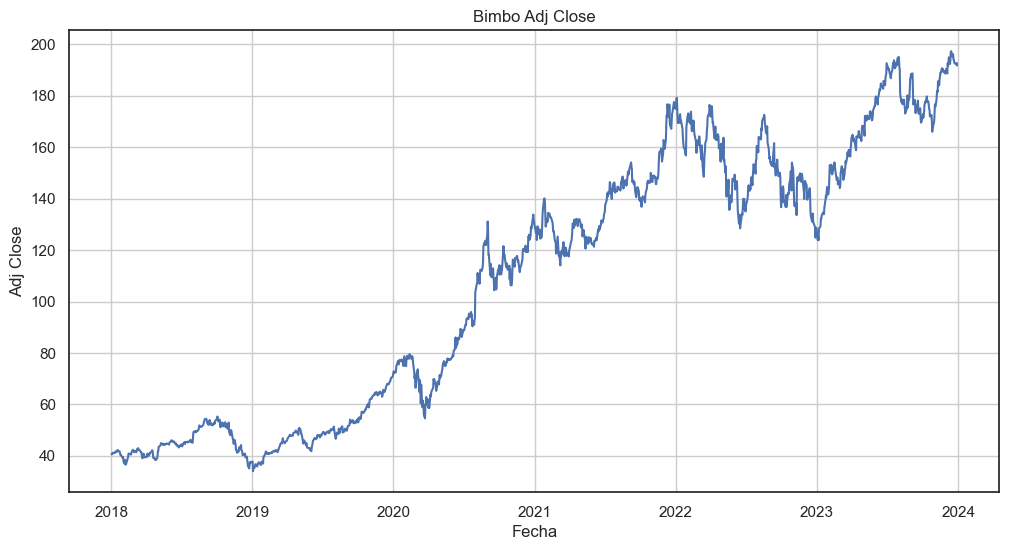

In [29]:
plt.figure(figsize=(12,6))
plt.plot(closes.index, closes['Adj Close'])
plt.title('Bimbo Adj Close')
plt.xlabel('Fecha')
plt.ylabel('Adj Close')
plt.grid(True)
plt.show()

In [56]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='D',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=False,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='Best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)

Start of Fit.....
    Target variable given as = Adj Close
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Adj Close']
    Using given input: pandas dataframe...
    train time series Date column is the index on test data...
    train data shape = (1207, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


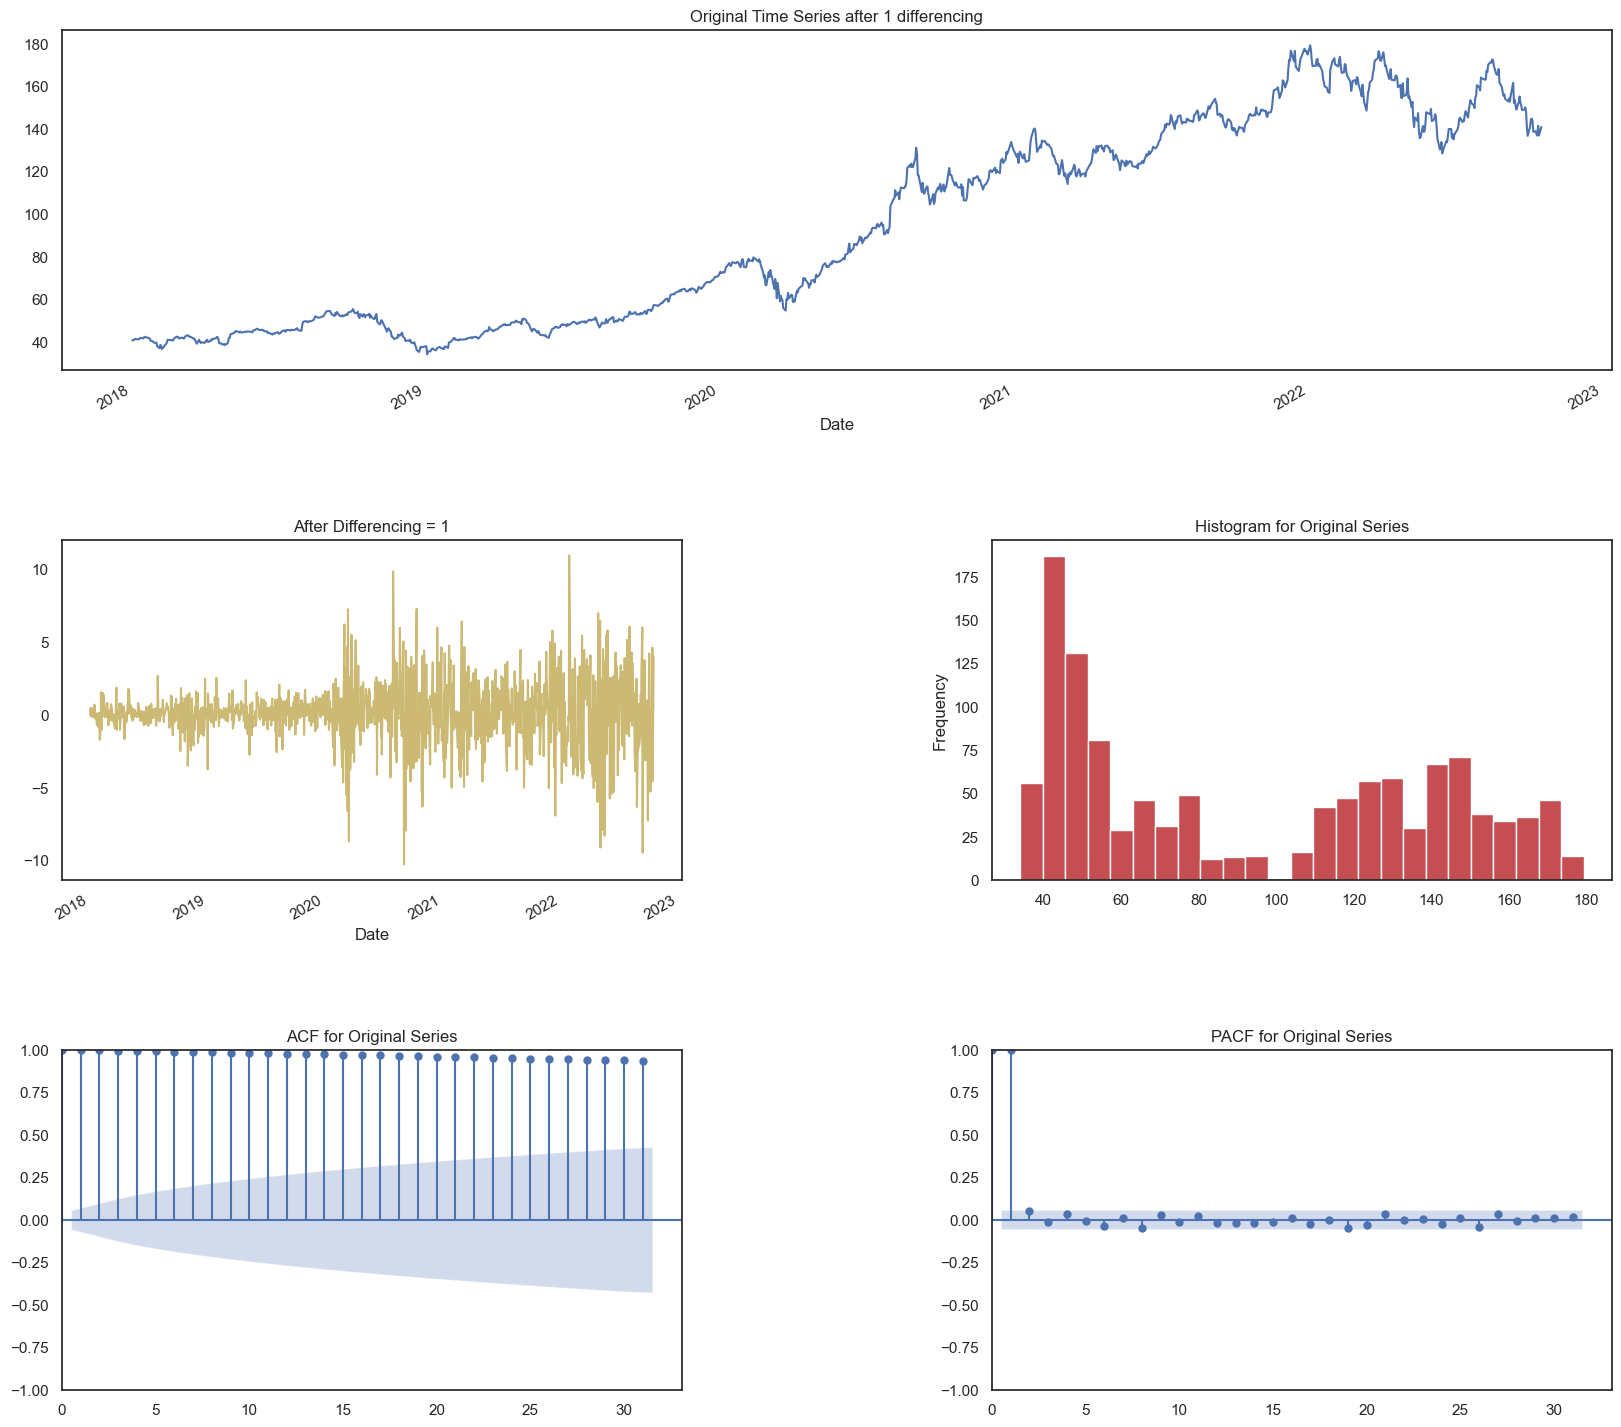

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1207, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 1182 Test Shape: 5


16:48:06 - cmdstanpy - INFO - Chain [1] start processing
16:48:06 - cmdstanpy - INFO - Chain [1] done processing
16:48:06 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 10.51
    Std Deviation of actuals = 1.62
    Normalized RMSE (as pct of std dev) = 651%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 1187 Test Shape: 5


16:48:06 - cmdstanpy - INFO - Chain [1] done processing
16:48:06 - cmdstanpy - INFO - Chain [1] start processing
16:48:06 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 8.46
    Std Deviation of actuals = 2.31
    Normalized RMSE (as pct of std dev) = 366%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 1192 Test Shape: 5


16:48:07 - cmdstanpy - INFO - Chain [1] start processing
16:48:07 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 15.76
    Std Deviation of actuals = 5.01
    Normalized RMSE (as pct of std dev) = 315%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 1197 Test Shape: 5


16:48:07 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 15.22
    Std Deviation of actuals = 2.79
    Normalized RMSE (as pct of std dev) = 545%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 1202 Test Shape: 5


16:48:07 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 17.43
    Std Deviation of actuals = 2.02
    Normalized RMSE (as pct of std dev) = 861%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 13.11
    MSE (Mean Squared Error = 193.18
    MAPE (Mean Absolute Percent Error) = 9%
    RMSE (Root Mean Squared Error) = 13.8989
    Normalized RMSE (MinMax) = 75%
    Normalized RMSE (as Std Dev of Actuals)= 228%
Time Taken = 2 seconds


16:48:07 - cmdstanpy - INFO - Chain [1] start processing
16:48:07 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 1182 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,1)*(0,0,0,12), aic = 5055.641
Static Forecasts:
    RMSE = 10.08
    Std Deviation of Actuals = 1.62
    Normalized RMSE (as pct of std dev) = 623.7%

Fold Number: 2 --> Train Shape: 1187 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,1)*(0,0,0,12), aic = 5097.944
Static Forecasts:
    RMSE = 2.91
    Std Deviation of Actuals = 2.31
    Normalized RMSE (as pct of std dev) = 125.8%

Fold Number: 3 --> Train Shape: 1192 Test Shape: 5

    Finding the 

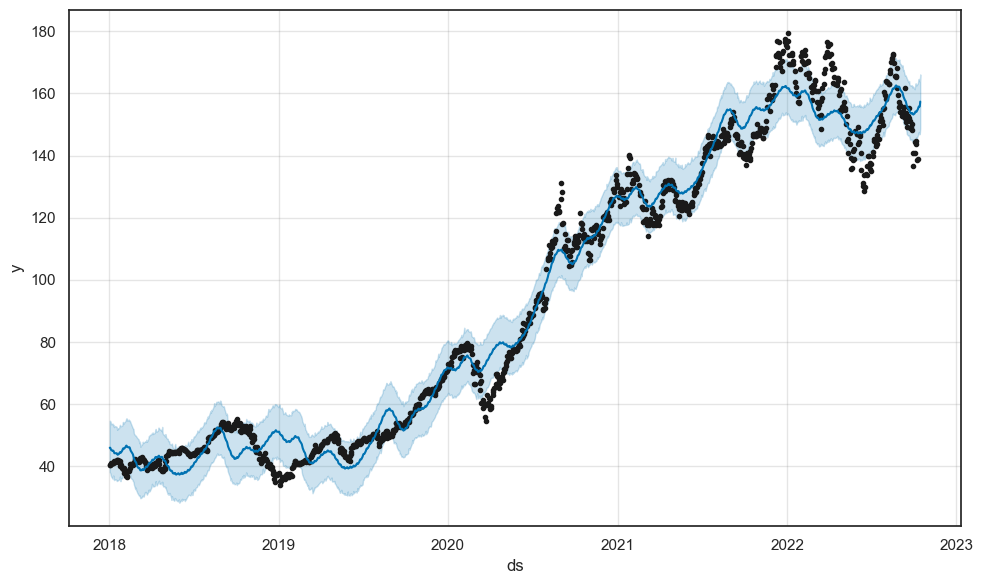

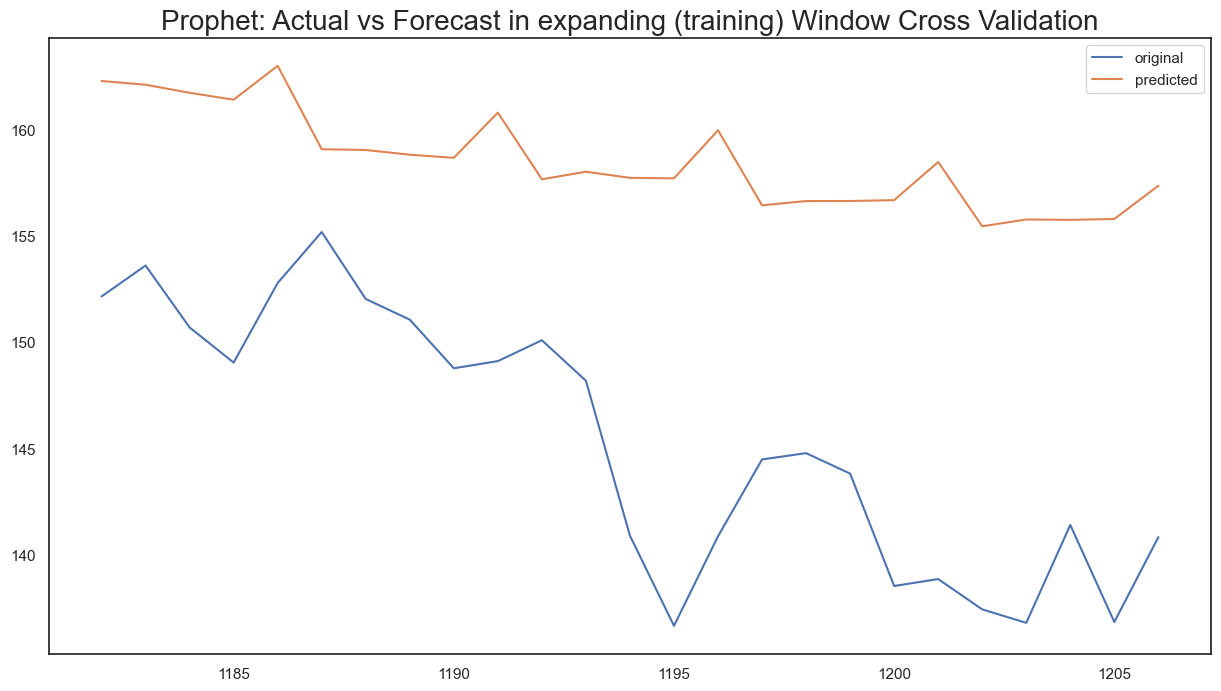

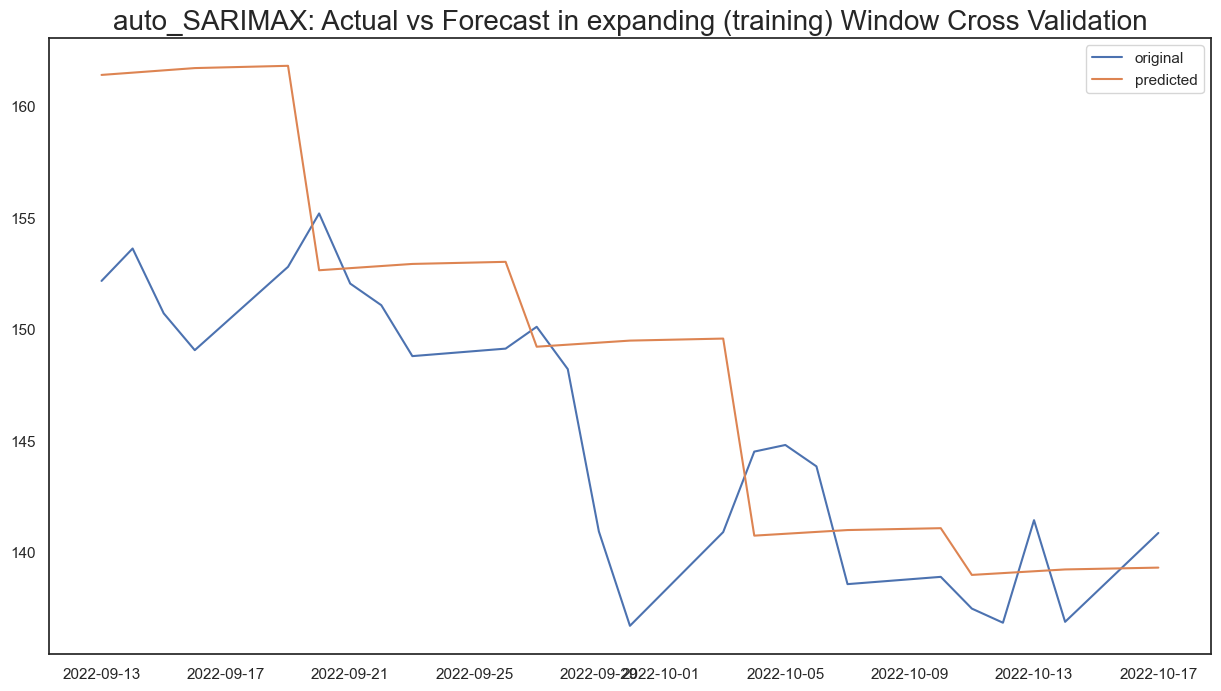

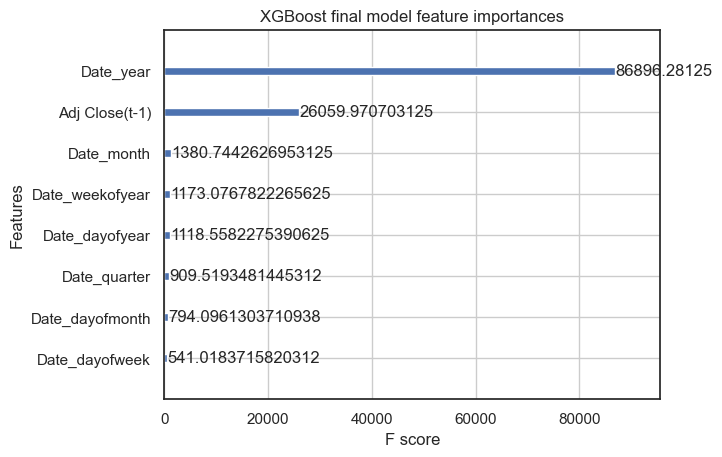

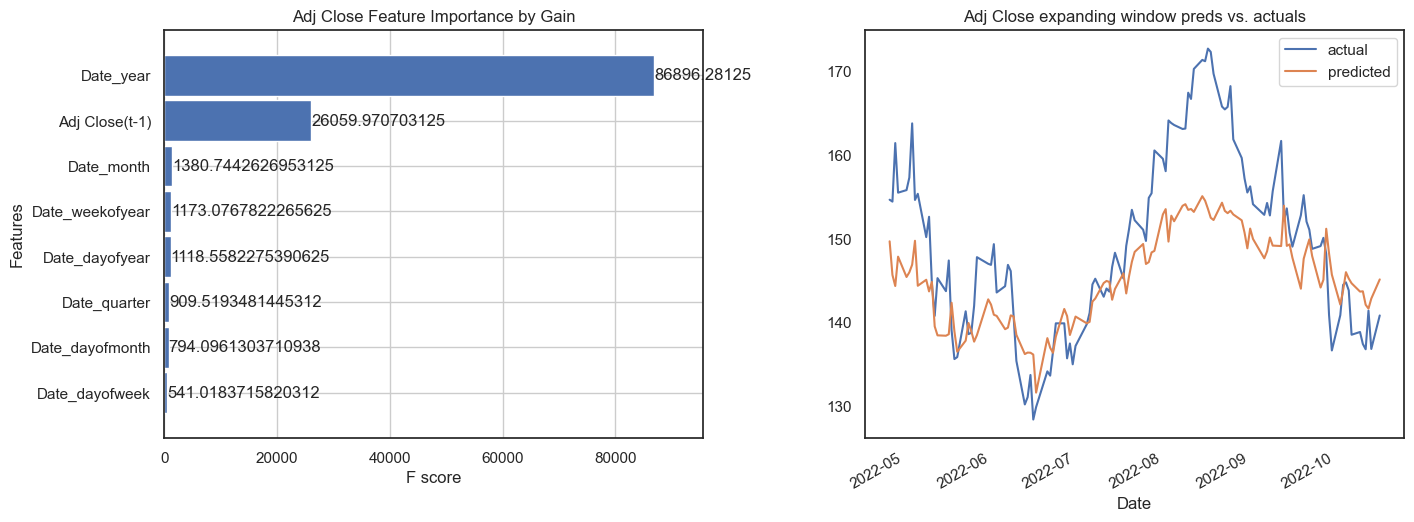

In [57]:
train_size = int(0.8 * len(closes))
train_df = closes[:train_size]
test_df = closes[train_size:]

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Adj Close'
)

In [58]:
forecast = model.predict(testdata=test_df)
forecast

Predicting using test dataframe as input for auto_SARIMAX model


Adj Close,yhat,mean_se,mean_ci_lower,mean_ci_upper
1207,140.665387,2.100855,136.547787,144.782988
1208,140.722621,2.874330,135.089038,146.356204
1209,140.779815,3.479936,133.959266,147.600364
1210,140.836969,3.994763,133.007376,148.666561
1211,140.894082,4.450429,132.171403,149.616762
...,...,...,...,...
1504,155.905747,33.872159,89.517535,222.293958
1505,155.951101,33.928916,89.451649,222.450554
1506,155.996416,33.985578,89.385908,222.606925
1507,156.041691,34.042146,89.320312,222.763071


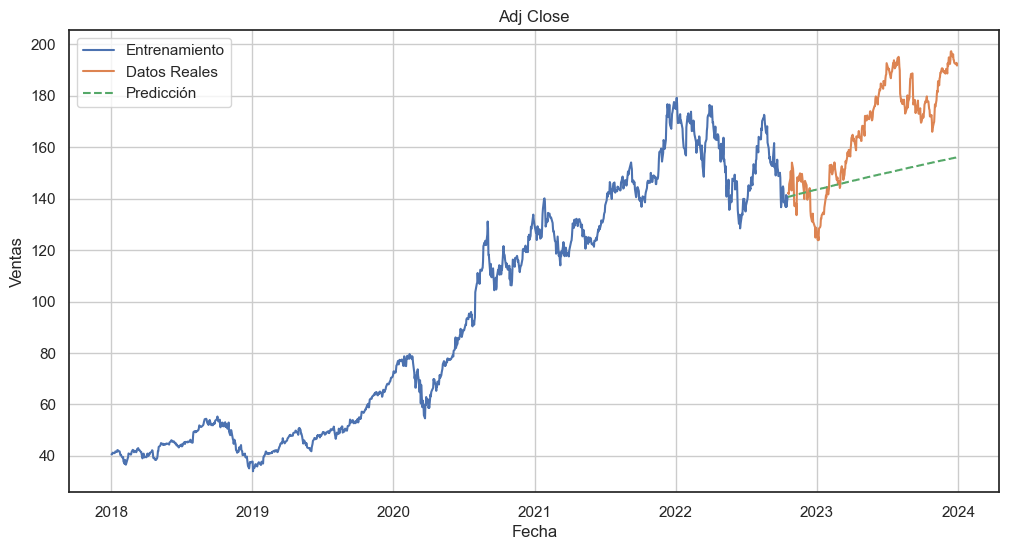

In [59]:
plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['Adj Close'], label='Entrenamiento')
plt.plot(test_df.index, test_df['Adj Close'], label='Datos Reales')
plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
plt.title('Adj Close')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_df['Adj Close'], forecast['yhat'], squared=False)
print(f'RMSE en el conjunto de prueba: {rmse:.2f}')

RMSE en el conjunto de prueba: 23.77
